## Pytorch Workflow
1. Data Prepare & load
2. Build model
3. Training, fitting data
4. Making predictions, evaluating
5. Save model & load model
6. putting together

Get data intoa numerical representation


Build a model to learn patterns in that numerica representation

In [46]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu124'

In [47]:
# Create *know* parameters
weight = 0.7
bias = 0.3

start=0
end=1
step=0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight * X + bias

In [48]:
X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [49]:
len(X),len(Y)

(50, 50)

## Splitting data into training and test set

Create a train/test split

In [50]:
train_split = int(0.8*len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]

In [51]:
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

Building a function to Visualize my data

In [52]:
def plot_predictions(
    train_data=X_train,
    train_labels=Y_train, # 'train_labels' represents the actual target values (labels) corresponding to the training data.
    test_data=X_test,
    test_labels=Y_test,
    predictions=None,):

  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=5, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=5, label="Testing data")

  if predictions is not None:
    # Plot the predictions if exist
    plt.scatter(test_data, predictions, c="r", s=5, label="Prediction data")

  # Show the legend
  plt.legend(prop={"size":14})

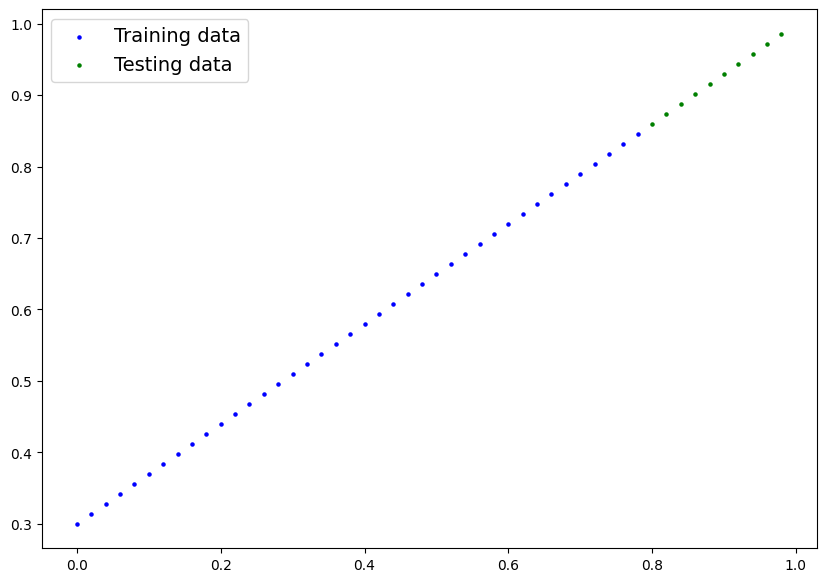

In [53]:
plot_predictions()

## Build model

Building class:
https://realpython.com/python3-object-oriented-programming/

Base class for all neural network modules.

https://pytorch.org/docs/stable/generated/torch.nn.Module.html

### What Our Model Does

- **Start with random values** (weight & bias)
- **Look at training data** and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

#### How Does It Do So?

Through two main algorithms:

1. **Gradient Descent**
2. **Backpropagation**

#### this model's building essentials:
1. `nn.Module` contains the larger building blocks (layers)
2. `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
3. `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)

In [61]:
from torch import nn

#Create liear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Define trainable parameter for the model
    self.weight = nn.Parameter(torch.randn(1,
                         requires_grad=True,
                         dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                        requires_grad=True,
                        dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    """
    Defines the forward pass of the neural network.
    Args:
        x (torch.Tensor): The input tensor to the model.
    Returns:
        torch.Tensor: The output tensor after processing.
    """
    return self.weight * x + self.bias

### Pytorch model building essentials
* torch.nn      - for computational graphs
* torch.nn.Parameter - for model to learn and try parameters(ofen in a pytorch layer)
* torch.nn.Module   - The base class for all neural network modules, overwrite forward if subclassed
* def forward    - define model's forward computation

more:https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of PyTorch model
`.parameters()` for check out model parameters or what's inside our model

In [62]:
# Create a random seed
torch.manual_seed(4221)

# Create an instance of the model
model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [63]:
# Check out parameters
model_0.parameters()
list(model_0.parameters())

[Parameter containing:
 tensor([-0.9314], requires_grad=True),
 Parameter containing:
 tensor([-0.6524], requires_grad=True)]

In [64]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([-0.9314])), ('bias', tensor([-0.6524]))])

### Making prediction using torch.inference_mode()
* Using X_test to predicts y_test.
* Run data through the forward() method
* using `inference_mode()``torch.no_grad()` to turn of gradient tracking, and save a lot of time

In [65]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [69]:
# Making predictions with model
# with torch.inference_mode():
#   y_preds = model_0(X_test)
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds

tensor([[-1.3975],
        [-1.4161],
        [-1.4348],
        [-1.4534],
        [-1.4720],
        [-1.4906],
        [-1.5093],
        [-1.5279],
        [-1.5465],
        [-1.5652]])

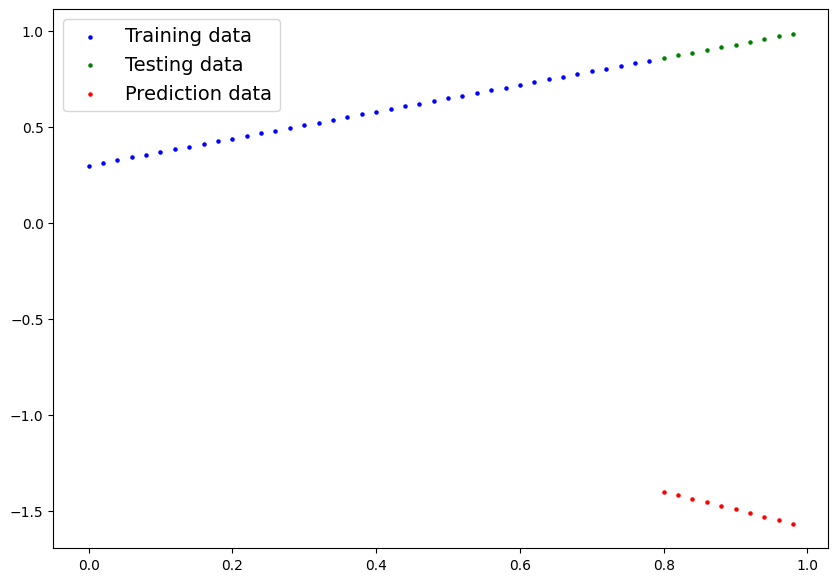

In [70]:
plot_predictions(predictions=y_preds)